# Getting to Grips with chromatic

## Basic Tutorial

Learning how to use chromatic (https://zkbt.github.io/chromatic/quickstart/)

In [1]:
from chromatic import *

Create a simulated lightcurve with some added noise

In [2]:
r = SimulatedRainbow(
    signal_to_noise=100, 
    dt=1*u.minute, 
    R=50)

Inject a transit

In [4]:
i = r.inject_transit(
    planet_radius=np.linspace(0.2, 0.1, r.nwave)
)

Plot:

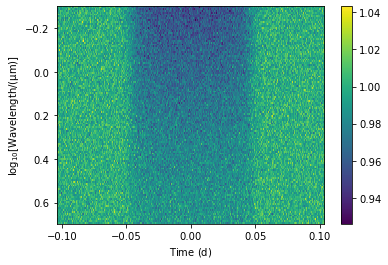

In [5]:
i.imshow();

Bin in wavelength and in time

In [6]:
b = i.bin(
    dw=0.5*u.micron, dt=20*u.minute
)


🌈 Warning: 
Uncertainties might not be handled well yet...


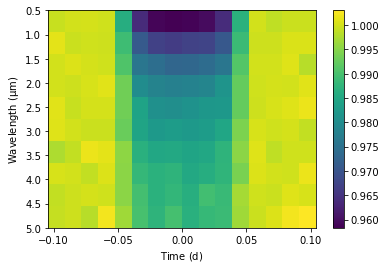

In [7]:
b.imshow();

Plot flux against time


🌈 Warning: 
Uncertainties might not be handled well yet...

🌈 Warning: 
Uncertainties might not be handled well yet...


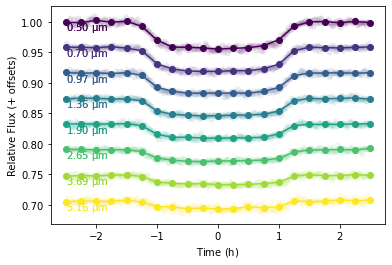

In [8]:
# r.bin(R=3).plot();
# i.bin(R=3).plot();
ax = i.bin(R=3).plot(plotkw=dict(alpha=0.1, markeredgecolor='none', linewidth=0))
i.bin(R=3, dt=15*u.minute).plot(ax=ax)

Compare with and without transit


🌈 Warning: 
Uncertainties might not be handled well yet...


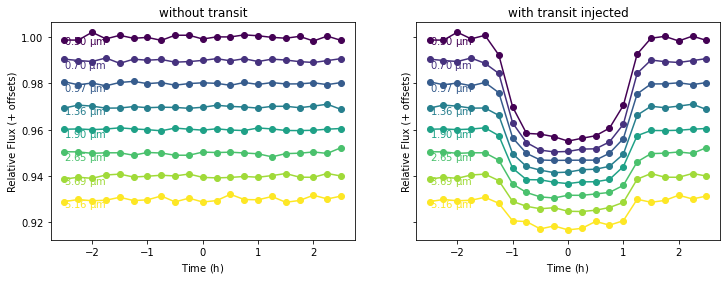

In [16]:
m = MultiRainbow([r, i], names=['without transit', 'with transit injected'])
m.bin(R=3, dt=15*u.minute).plot(spacing=0.01)

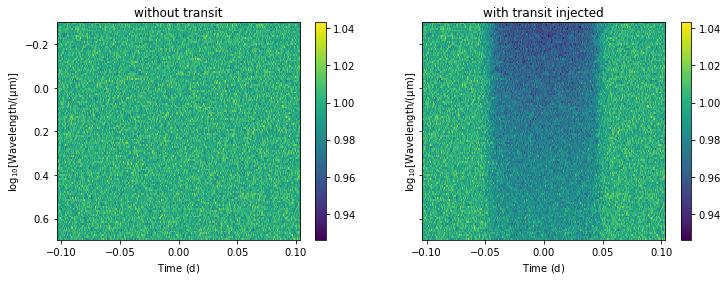

In [17]:
m.imshow()

Animate lightcurves (saved in directory)

In [9]:
i.animate_lightcurves();

In [10]:
i.animate_spectra();

Get info about the r object:

In [18]:
# access the 1D array of wavelengths
print(f'The {r.nwave} wavelengths...')
print(f'  have a shape of {r.wavelength.shape},')
print(f'  a type of {type(r.wavelength)},')
print(f'  units of {r.wavelength.unit}, and')
print(f'  a dtype of {r.wavelength.dtype}')

# access the 1D array of times
print(f'The {r.ntime} times...')
print(f'  have a shape of {r.time.shape},')
print(f'  a type of {type(r.time)},')
print(f'  units of {r.time.unit}, and')
print(f'  a dtype of {r.time.dtype}')

# access the 2D array of times
print(f'The {r.nflux} uncertainties...')
print(f'  have a shape of {r.uncertainty.shape},')
print(f'  a type of {type(r.uncertainty)},')
print(f'  a dtype of {r.uncertainty.dtype}')

The 116 wavelengths...
  have a shape of (116,),
  a type of <class 'astropy.units.quantity.Quantity'>,
  units of micron, and
  a dtype of float64
The 300 times...
  have a shape of (300,),
  a type of <class 'astropy.units.quantity.Quantity'>,
  units of h, and
  a dtype of float64
The 34800 uncertainties...
  have a shape of (116, 300),
  a type of <class 'numpy.ndarray'>,
  a dtype of float64


In [19]:
r.wavelike

{'wavelength': <Quantity [0.5       , 0.51010067, 0.52040539, 0.53091827, 0.54164353,
            0.55258546, 0.56374843, 0.5751369 , 0.58675544, 0.59860868,
            0.61070138, 0.62303837, 0.63562458, 0.64846504, 0.66156491,
            0.6749294 , 0.68856388, 0.7024738 , 0.71666471, 0.73114229,
            0.74591235, 0.76098078, 0.77635361, 0.79203699, 0.8080372 ,
            0.82436064, 0.84101382, 0.85800343, 0.87533625, 0.89301922,
            0.9110594 , 0.92946402, 0.94824044, 0.96739617, 0.98693887,
            1.00687635, 1.02721661, 1.04796776, 1.06913811, 1.09073613,
            1.11277046, 1.13524992, 1.15818349, 1.18158035, 1.20544985,
            1.22980156, 1.25464519, 1.27999071, 1.30584824, 1.33222812,
            1.35914091, 1.38659738, 1.41460851, 1.44318549, 1.47233978,
            1.50208301, 1.5324271 , 1.56338418, 1.59496664, 1.6271871 ,
            1.66005846, 1.69359387, 1.72780673, 1.76271074, 1.79831986,
            1.83464833, 1.87171069, 1.90952175, 1.

In [20]:
r.metadata

{'R': 50, 'wscale': 'log', 'signal_to_noise': 100}

## Load in Example Data

Import example dataset

In [21]:
rainbow_chromatic = Rainbow('example-datasets/chromatic/simulated.rainbow.npy')

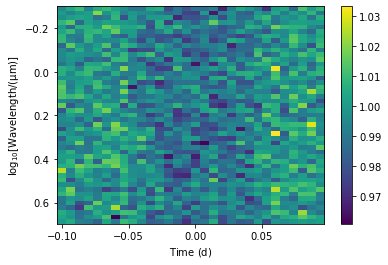

In [22]:
rainbow_chromatic.imshow();

The jwst pipeline developed at the Space Telescope Science Institute will produce extract 1D stellar spectra for time-series observations with the James Webb Space Telescope. Details about the pipeline itself are available https://jwst-pipeline.readthedocs.io/en/latest/.

In [23]:
rainbow_stsci = Rainbow('example-datasets/stsci/*_x1dints.fits')

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:08<00:00,  2.46it/s]


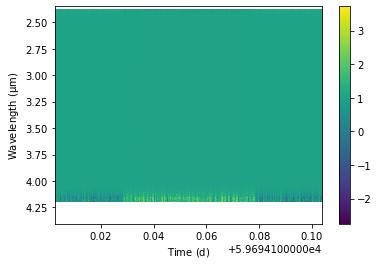

In [24]:
rainbow_stsci.normalize().imshow();

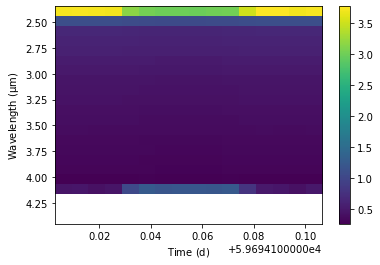

In [25]:
b = rainbow_stsci.bin(dw=100*u.nm, dt=10*u.minute)
b.imshow();

The eureka pipeline is one of many community tools being designed to extract spectra from JWST data

In [26]:
rainbow_eureka = Rainbow('example-datasets/eureka/S3_wasp43b_Table_Save.txt')

100%|███████████████████████████████████████████████████████████████████████████| 1600/1600 [00:00<00:00, 14728.90it/s]


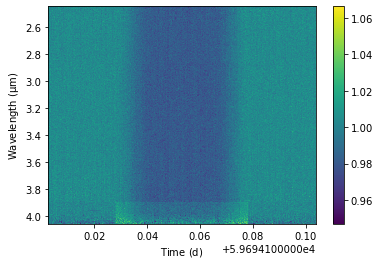

In [27]:
rainbow_eureka.normalize().imshow();